In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.wcs import WCS

import pitszi

In [2]:
C = pitszi.Model(M500=1e15*u.Msun)
C.set_pressure_profile_universal_param('A10MD')
C.set_density_profile_polytropic_param()
C.model_pressure_fluctuation['Norm'] = 0.5
C.model_pressure_fluctuation['statistics'] = 'lognormal'

                        _  _    ___  ____ _                 
                  _ __ (_)| |_ / __||_  /(_)                
                 | '_ \| ||  _|\__ \ / / | |                
                 | .__/|_| \__||___//___||_|                
                 |_|                                        
   Probing ICM Turbulence from Sunyaev-Zel'dovich Imaging   
------------------------------------------------------------
                           Model                            
------------------------------------------------------------
Setting gNFW Planck coll. (2013) UPP.
Setting SVM Ghirardini (2019) UPP.
Setting gNFW Arnaud et al. (2010) morphologically disturbed.


# Extract observables

Setting model_seed_fluctuation value
----- INFO: pressure fluctuation cube rms.
            Expected rms over the full k range: 0.5
            Expected rms given the missing k range: 0.4438025938629119
            Actual rms for this noise realization: 0.46453911668508335
----- INFO: pressure fluctuation cube rms.
            Expected rms over the full k range: 0.5
            Expected rms given the missing k range: 0.4438025938629119
            Actual rms for this noise realization: 0.46453911668508335
----- INFO: pressure fluctuation cube rms.
            Expected rms over the full k range: 0.5
            Expected rms given the missing k range: 0.4438025938629119
            Actual rms for this noise realization: 0.46453911668508335
----- INFO: pressure fluctuation cube rms.
            Expected rms over the full k range: 0.5
            Expected rms given the missing k range: 0.4438025938629119
            Actual rms for this noise realization: 0.46453911668508335
----- INFO: pre

Text(0.5, 1.0, 'Sx')

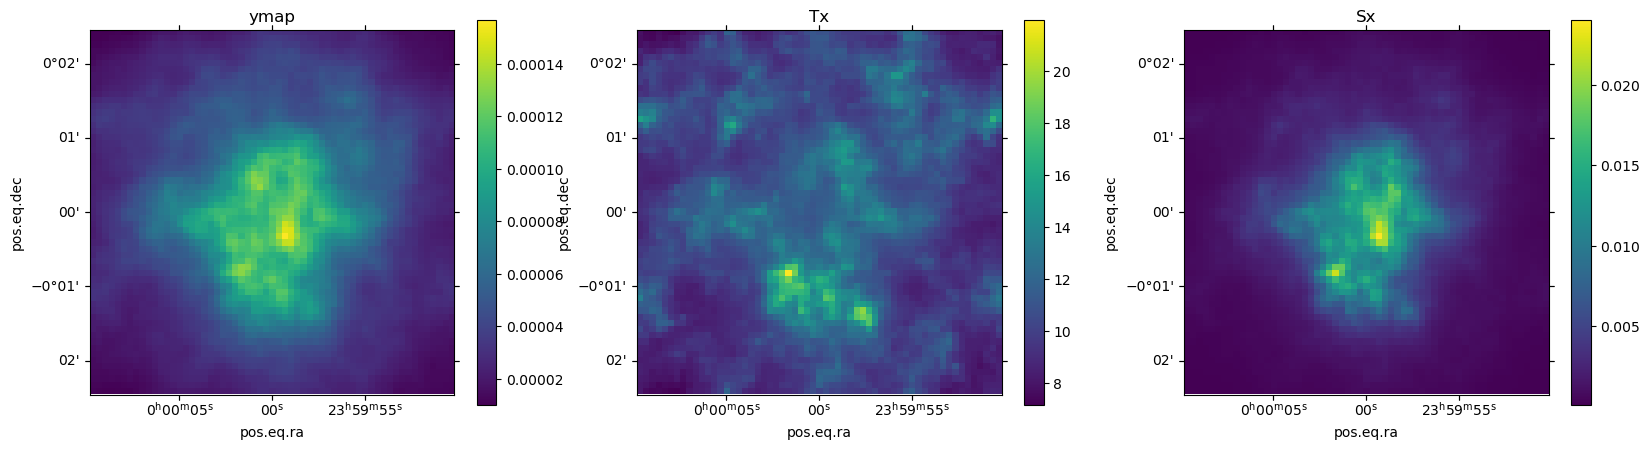

In [3]:
C.new_seed()

sz = C.get_sz_map()
Tx = C.get_Tx_map(no_fluctuations=False)
sx = C.get_sx_map()

plt.figure(figsize=(20,5))
ax = plt.subplot(1, 3, 1, projection=WCS(C.get_map_header()))
plt.imshow(sz)
plt.colorbar()
plt.title('ymap')

ax = plt.subplot(1, 3, 2, projection=WCS(C.get_map_header()))
plt.imshow(Tx.value)
plt.colorbar()
plt.title('Tx')

ax = plt.subplot(1, 3, 3, projection=WCS(C.get_map_header()))
plt.imshow(sx)
plt.colorbar()
plt.title('Sx')

In [4]:
pressure_profile_cube     = C.get_pressure_cube_profile()
density_profile_cube     = C.get_density_cube_profile()
temperature_profile_cube = C.get_temperature_cube_profile()

pressure_fluctuation_cube = C.get_pressure_cube_fluctuation()
density_fluctuation_cube     = C.get_density_cube_fluctuation()
temperature_fluctuation_cube = C.get_temperature_cube_fluctuation()

P3d = pressure_profile_cube     * (1 + pressure_fluctuation_cube)
n3d = density_profile_cube     * (1 + density_fluctuation_cube)
T3d = temperature_profile_cube * (1 + temperature_fluctuation_cube)

----- INFO: pressure fluctuation cube rms.
            Expected rms over the full k range: 0.5
            Expected rms given the missing k range: 0.4438025938629119
            Actual rms for this noise realization: 0.46453911668508335
----- INFO: pressure fluctuation cube rms.
            Expected rms over the full k range: 0.5
            Expected rms given the missing k range: 0.4438025938629119
            Actual rms for this noise realization: 0.46453911668508335
----- INFO: pressure fluctuation cube rms.
            Expected rms over the full k range: 0.5
            Expected rms given the missing k range: 0.4438025938629119
            Actual rms for this noise realization: 0.46453911668508335


# Cubes

In [3]:
p = C.get_pressure_cube_profile()
n = C.get_density_cube_profile()
t = C.get_temperature_cube_profile()
k = C.get_entropy_cube_profile()

In [5]:
p = C.get_pressure_cube_fluctuation()
n = C.get_density_cube_fluctuation()
t = C.get_temperature_cube_fluctuation()
k = C.get_entropy_cube_fluctuation()

----- INFO: fluctuation cube rms.
            Expected rms over the full k range: 0.25
            Expected rms given the missing k range: 0.23325126772435212
            Actual rms for this noise realization: 0.2317514305517226
----- INFO: fluctuation cube rms.
            Expected rms over the full k range: 0.25
            Expected rms given the missing k range: 0.23325126772435212
            Actual rms for this noise realization: 0.2317514305517226
----- INFO: fluctuation cube rms.
            Expected rms over the full k range: 0.25
            Expected rms given the missing k range: 0.23325126772435212
            Actual rms for this noise realization: 0.2317514305517226
----- INFO: fluctuation cube rms.
            Expected rms over the full k range: 0.25
            Expected rms given the missing k range: 0.23325126772435212
            Actual rms for this noise realization: 0.2317514305517226


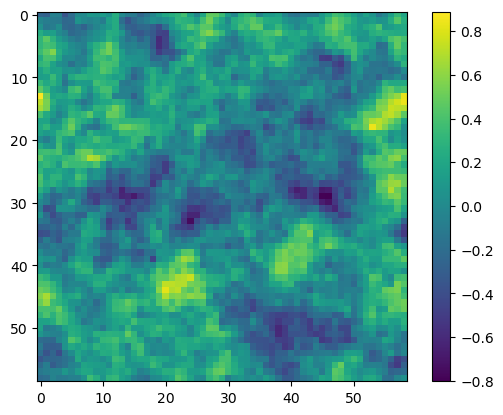

In [18]:
plt.imshow((p)[100])
plt.colorbar()

# Modif of seeding

----- INFO: fluctuation cube rms.
            Expected rms over the full k range: 0.25
            Expected rms given the missing k range: 0.23325126772435212
            Actual rms for this noise realization: 0.23700637359694196


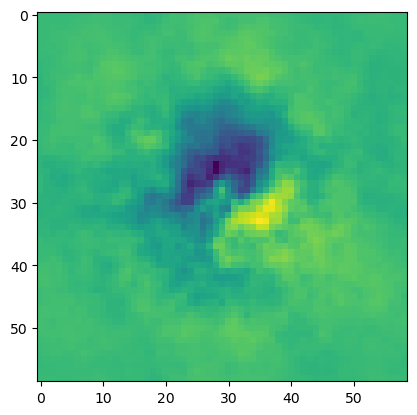

In [3]:
plt.imshow(C.get_sz_map() - C.get_sz_map(no_fluctuations=True))

----- INFO: fluctuation cube rms.
            Expected rms over the full k range: 0.25
            Expected rms given the missing k range: 0.23325126772435212
            Actual rms for this noise realization: 0.23700637359694196


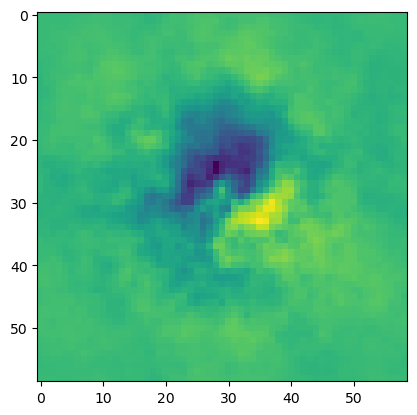

In [4]:
plt.imshow(C.get_sz_map() - C.get_sz_map(no_fluctuations=True))

In [5]:
C.new_seed()

Setting model_seed_fluctuation value


----- INFO: fluctuation cube rms.
            Expected rms over the full k range: 0.25
            Expected rms given the missing k range: 0.23325126772435212
            Actual rms for this noise realization: 0.237247476477356


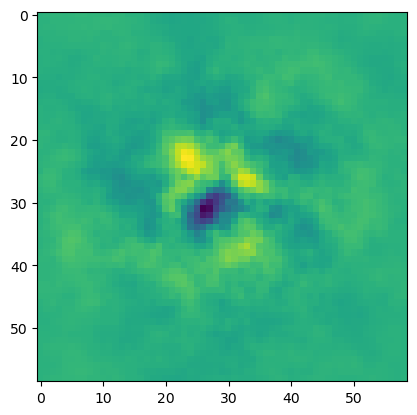

In [6]:
plt.imshow(C.get_sz_map() - C.get_sz_map(no_fluctuations=True))

# Modif of profiles

In [3]:
set_profile_using_T_model = False

if set_profile_using_T_model:
    rmod = np.logspace(-1,5,1000)*u.kpc
    Tmod = (1+rmod.value/1000)**-1*u.keV + 10*u.keV
    C.set_pressure_profile_from_temperature_model({'name':'User', 'profile':Tmod, 'radius':rmod})

In [4]:
r, n = C.get_density_profile()
r, p = C.get_pressure_profile()
r, t = C.get_temperature_profile()
r, k = C.get_entropy_profile()
r, mhse = C.get_Mhse_profile()
r, odhse = C.get_overdensity_profile()
r, odhse2 = C.get_overdensity_profile(bHSE=0.2)
r, Mgas = C.get_Mgas_profile()
r, fgas = C.get_fgas_profile()
r, fgas2 = C.get_fgas_profile(Npt_per_decade_integ=5)
r, fgas3 = C.get_fgas_profile(bHSE=0.2)
r, Uth = C.get_Ethermal_profile()
r, Uth2 = C.get_Ethermal_profile(Npt_per_decade_integ=5)

Text(0.5, 1.0, 'U thermal')

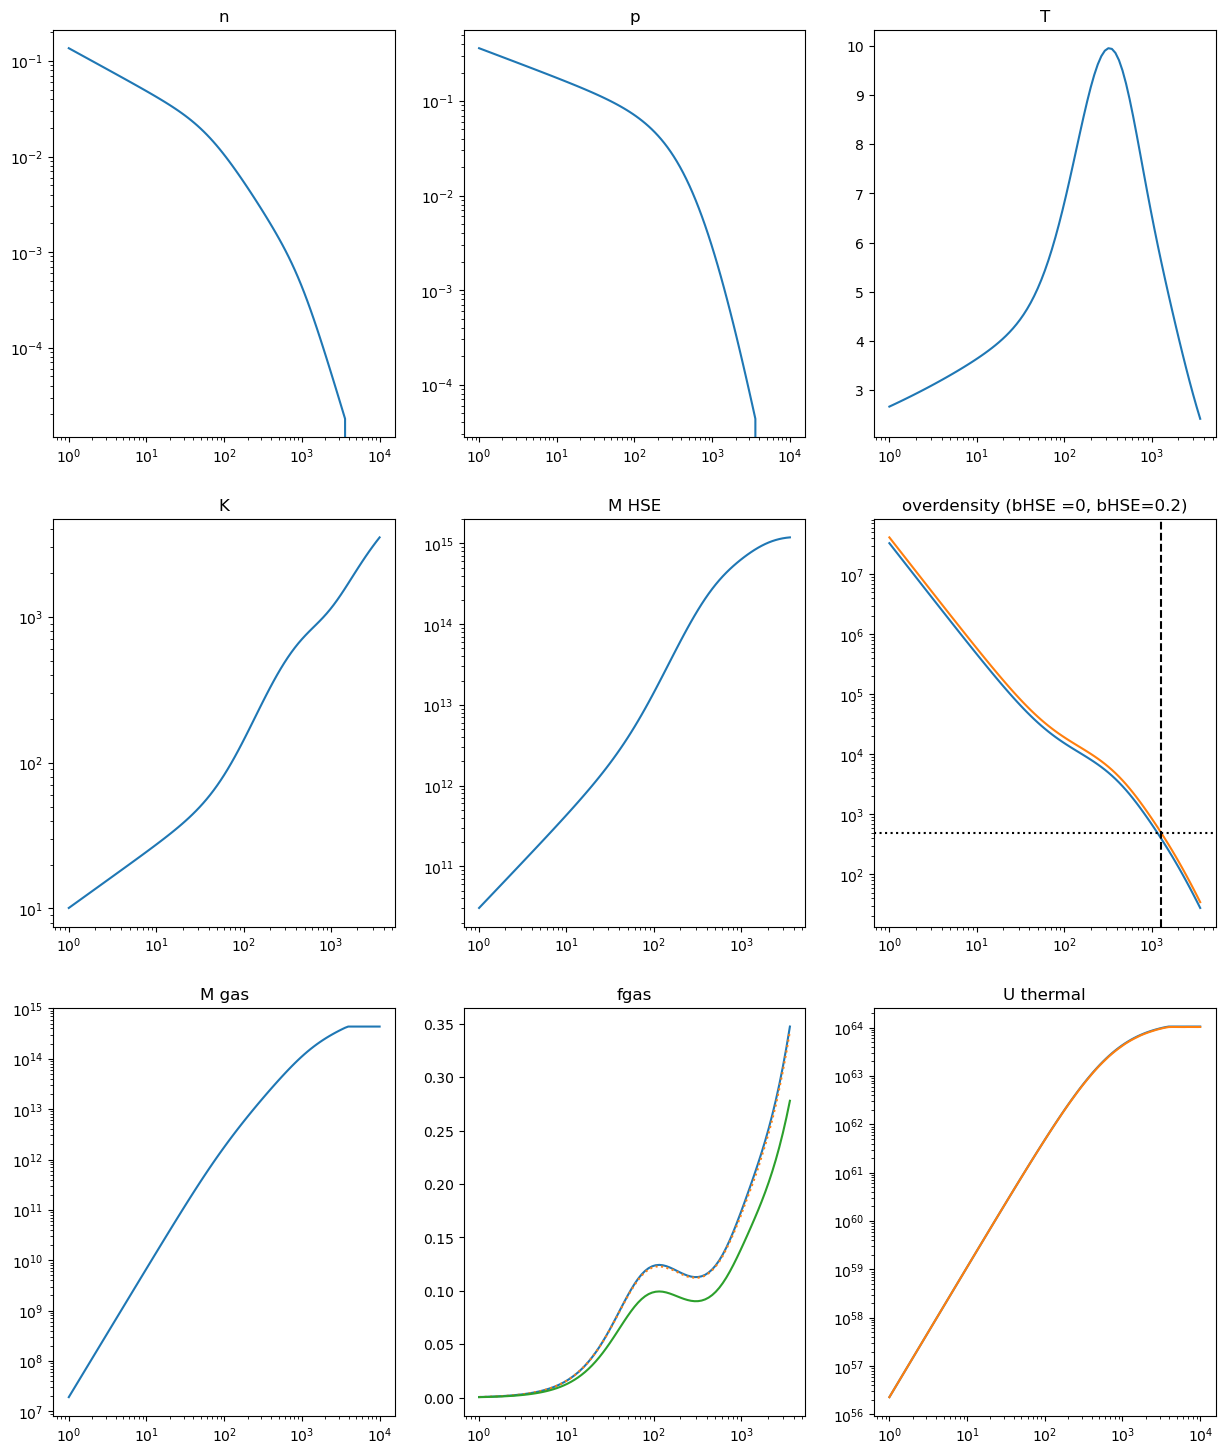

In [5]:
plt.figure(0, figsize=(15,18))
ax = plt.subplot(3, 3, 1)
plt.loglog(r,n)
plt.title('n')

ax = plt.subplot(3, 3, 2)
plt.loglog(r,p)
plt.title('p')

ax = plt.subplot(3, 3, 3)
plt.plot(r,t)
plt.xscale('log')
plt.title('T')

ax = plt.subplot(3, 3, 4)
plt.loglog(r,k)
plt.title('K')

ax = plt.subplot(3, 3, 5)
plt.loglog(r,mhse)
plt.title('M HSE')

ax = plt.subplot(3, 3, 6)
plt.loglog(r,odhse)
plt.loglog(r,odhse2)
plt.axhline(500, color='k', ls=':')
plt.axvline(C.R500.to_value('kpc'), color='k', ls='--')
plt.title('overdensity (bHSE =0, bHSE=0.2)')

ax = plt.subplot(3, 3, 7)
plt.loglog(r,Mgas)
plt.title('M gas')

ax = plt.subplot(3, 3, 8)
plt.plot(r,fgas)
plt.plot(r,fgas2, ls=':')
plt.plot(r,fgas3)
plt.xscale('log')
plt.title('fgas')

ax = plt.subplot(3, 3, 9)
plt.loglog(r,Uth)
plt.loglog(r,Uth2)
plt.title('U thermal')